## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
study = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
group = pd.merge(study_results, mouse_metadata)
study2 = study.loc[study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
study1 = study[study['Mouse ID'].isin(study2)==False]
study1.drop_duplicates(['Mouse ID']).head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study1.nunique()['Mouse ID']

248

In [3]:
study2

array(['g989'], dtype=object)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study = study.drop_duplicates()
#print(study)
study.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,19.582452,50.451260,1.022199,12.810254,25.662262
std,14.075984,8.896191,1.138032,7.189027,3.922652
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.954697,1.000000,13.000000,27.000000
75%,30.000000,56.298917,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [5]:
test =study[study['Mouse ID'] == ('g989')]
test

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
Mean = study1.groupby(['Drug Regimen','Timepoint']).mean()['Tumor Volume (mm3)']
mean_1 = pd.DataFrame(Mean)
mean_1

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325
...                                    ...
Zoniferol    25                  55.432935
             30                  57.713531
             35                  60.089372
             40                  62.916692
             45                  65.960888

[100 rows x 1 columns]

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = study1[['Mouse ID','Timepoint','Drug Regimen', 'Tumor Volume (mm3)']].drop_duplicates(['Mouse ID'])
clean

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,0,Capomulin,45.0
10,f932,0,Ketapril,45.0
11,g107,0,Ketapril,45.0
19,a457,0,Ketapril,45.0
22,c819,0,Ketapril,45.0
...,...,...,...,...
1848,t565,0,Capomulin,45.0
1858,i557,0,Capomulin,45.0
1868,m957,0,Capomulin,45.0
1878,f966,0,Capomulin,45.0


In [8]:
study1['Drug Regimen'].drop_duplicates()

0       Capomulin
10       Ketapril
63       Naftisol
213     Infubinol
428      Stelasyn
436      Ramicane
908     Zoniferol
1068     Propriva
1100      Placebo
1304     Ceftamin
Name: Drug Regimen, dtype: object

In [9]:
# Checking the number of mice in the clean DataFrame.
Me= study.groupby(['Drug Regimen','Timepoint']).median()['Tumor Volume (mm3)']
vari = study.groupby(['Drug Regimen','Timepoint']).var()['Tumor Volume (mm3)']
stan = study.groupby(['Drug Regimen','Timepoint']).std()['Tumor Volume (mm3)']
s= study.groupby(['Drug Regimen','Timepoint']).sem()['Tumor Volume (mm3)']
Stat = pd.DataFrame({'Mean Tumor Volume': Mean,
'Median Tumor Volume': Me,
'Tumor Volume Variance': vari,
'Tumor Volume Std. Dev.': stan,
'Tumor Volume Std Err.': s})
Stat

Mean Tumor Volume  Median Tumor Volume  \
Drug Regimen Timepoint                                           
Capomulin    0                  45.000000            45.000000   
             5                  44.266086            45.597064   
             10                 43.084291            43.421014   
             15                 42.064317            42.798160   
             20                 40.716325            40.716428   
...                                   ...                  ...   
Zoniferol    25                 55.432935            55.676604   
             30                 57.713531            57.419744   
             35                 60.089372            60.365832   
             40                 62.916692            62.274543   
             45                 65.960888            65.684689   

                        Tumor Volume Variance  Tumor Volume Std. Dev.  \
Drug Regimen Timepoint                                                  
Capomulin    0                       0.000000                0.000000   
             5                       5.030889                2.242964   
             10                     12.344133                3.513422   
             15                     16.878693                4.108369   
             20                     19.035028                4.362915   
...                                       ...                     ...   
Zoniferol    25                      5.808348                2.410052   
             30                      9.601024                3.098552   
             35                     10.876760                3.297993   
             40                     13.958456                3.736102   
             45                     14.100301                3.755037   

                        Tumor Volume Std Err.  
Drug Regimen Timepoint                         
Capomulin    0                       0.000000  
             5                       0.448593  
             10                      0.702684  
             15                      0.838617  
             20                      0.909731  
...                                       ...  
Zoniferol    25                      0.602513  
             30                      0.800043  
             35                      0.881426  
             40                      0.998515  
             45                      1.003576  

[100 rows x 5 columns]

In [10]:
## Summary Statistics 


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Su = pd.DataFrame({'Mean Tumor Volume': study.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],
'Median Tumor Volume': study.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],
'Tumor Volume Variance': study.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],
'Tumor Volume Std. Dev.': study.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],
'Tumor Volume Std Err.': study.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']})
Su 
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
I = pd.MultiIndex.from_tuples([('Tumor Volume (mm3)','Mean','Median','Var','Std.Dev','Std.Err.')])
I
Tab = pd.DataFrame({'Mean': study.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],
'Median': study.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],
'Variance': study.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],
'Std. Dev.': study.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],
'Std Err.': study.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']})
Tab 
# This method produces everything in a single groupby function


,Mean,Median,Variance,Std. Dev.,Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

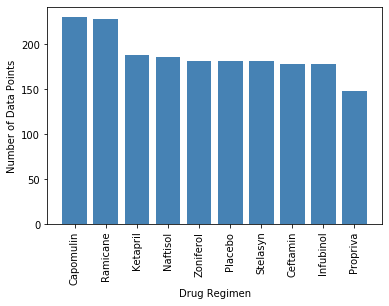

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar = study1['Drug Regimen'].value_counts()
bar
plt.bar(bar.index.values,bar.values, color='steelblue')
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

In [14]:
bar

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

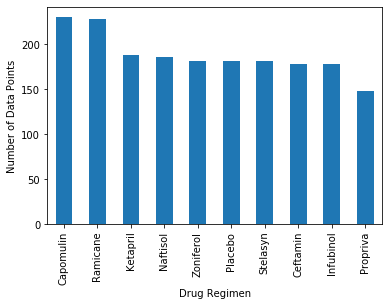

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bars = study1['Drug Regimen'].value_counts()
bars
# x_axis =('Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva')
#plt.bar(x_axis,bars, color='steelblue', alpha=0.90, align="center", width=.6)
bars.plot(kind= "bar")
plt.xticks(rotation="vertical")
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

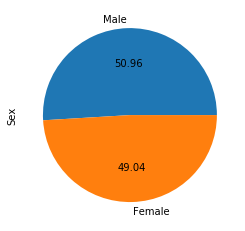

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Gen = study1['Sex'].value_counts()
Gen.sum()
M = Gen['Male']/Gen.sum()
M
F =Gen['Female']/Gen.sum()
F

plot = round(Gen).plot.pie(autopct='%.2f')

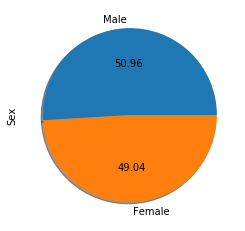

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gen = study1['Sex'].value_counts()
round(Gen)
labels = ["Male","Female"]
explode = (0, 0, 0, 0)

plt.pie(Gen,labels= labels,autopct='%.2f',shadow=True)
plt.ylabel('Sex')
plt.show()

In [18]:
T =study1[(study1["Drug Regimen"]== 'Capomulin')]
x= study1.groupby(['Mouse ID'])['Timepoint'].max()
merg = study1.merge(x,on= ['Mouse ID',"Timepoint"])

In [19]:
## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
q = merg[(merg["Drug Regimen"]== 'Ramicane')]
o =merg[(merg["Drug Regimen"]== 'Infubinol')]
p= merg[(merg["Drug Regimen"]== 'Ceftamin')]
T1 =merg[(merg["Drug Regimen"]== 'Capomulin')]
# Start by getting the last (greatest) timepoint for each mouse
x= study1.groupby(['Mouse ID'])['Timepoint'].max()
x
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merg = study1.merge(x,on= ['Mouse ID',"Timepoint"])
merg

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [21]:
q

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
58,c458,30,38.342008,2,Ramicane,Female,23,20
59,q610,35,36.561652,2,Ramicane,Female,18,21
60,j913,45,31.560470,1,Ramicane,Female,4,17
61,a411,45,38.407618,1,Ramicane,Male,3,22
62,a444,45,43.047543,0,Ramicane,Female,10,25
63,d251,45,37.311236,2,Ramicane,Female,8,19
64,j989,45,36.134852,1,Ramicane,Male,8,19
65,y449,15,44.183451,0,Ramicane,Male,19,24
66,k403,45,22.050126,1,Ramicane,Male,21,16
67,c758,45,33.397653,1,Ramicane,Male,9,17


In [22]:
o

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
33,y163,45,67.685569,3,Infubinol,Female,17,27
34,k483,45,66.196912,3,Infubinol,Female,20,30
35,k804,35,62.117279,2,Infubinol,Female,23,29
36,o809,35,55.629428,1,Infubinol,Male,3,25
37,z581,45,62.754451,3,Infubinol,Female,24,25
38,a251,45,65.525743,1,Infubinol,Female,21,25


In [23]:
p

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
168,x822,45,61.386660,3,Ceftamin,Male,3,29
169,l558,10,46.784535,0,Ceftamin,Female,13,30
170,l733,45,64.299830,1,Ceftamin,Female,4,30
171,f436,15,48.722078,2,Ceftamin,Female,3,25
172,l490,30,57.918381,3,Ceftamin,Male,24,26
173,b759,30,55.742829,1,Ceftamin,Female,12,25
174,l471,45,67.748662,1,Ceftamin,Female,7,28
175,y865,45,64.729837,3,Ceftamin,Male,23,26
176,y769,45,68.594745,4,Ceftamin,Female,6,27
177,l661,45,59.851956,3,Ceftamin,Male,18,26


In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = study1.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerqquartiles

# Locate the rows which contain mice on each drug and get the tumor volumes
t3 = T1[['Tumor Volume (mm3)','Timepoint','Drug Regimen']]
p1= p[['Tumor Volume (mm3)','Timepoint','Drug Regimen']]
o1= o[['Tumor Volume (mm3)','Timepoint','Drug Regimen']]
q1= q[['Tumor Volume (mm3)','Timepoint','Drug Regimen']]    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

In [25]:
t3

,Tumor Volume (mm3),Timepoint,Drug Regimen
0,38.982878,45,Capomulin
224,38.753265,35,Capomulin
225,32.377357,45,Capomulin
226,23.343598,45,Capomulin
227,38.939633,45,Capomulin
228,28.484033,45,Capomulin
229,41.483008,45,Capomulin
230,40.728578,45,Capomulin
231,46.539206,15,Capomulin
232,31.023923,45,Capomulin


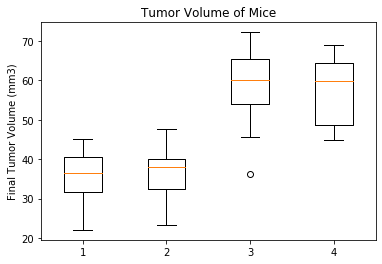

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor= q1['Tumor Volume (mm3)'], t3['Tumor Volume (mm3)'], o1['Tumor Volume (mm3)'], p1['Tumor Volume (mm3)']
plt.subplots()
plt.title('Tumor Volume of Mice')
plt.ylabel('Final Tumor Volume (mm3)')
# plt.xticks([Capomulin, Ramicane, Infubinol, Ceftamin])
plt.boxplot(Tumor)
plt.show()

## Line and Scatter Plots

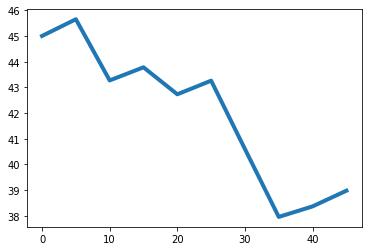

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lin = study1[['Tumor Volume (mm3)','Timepoint','Drug Regimen']]
lin
s= lin.iloc[0:10,2]
l =lin.iloc[0:10,1]
e=lin.iloc[0:10,0]
e1 =[45.00, 45.65, 43.27, 43.78, 42.73, 43.26, 40.60, 37.96, 38.37, 38.98]
l1 =[0,5,10,15,20,25,30,35,40,45]
c= pd.DataFrame({'Time Point':l,'Tumor Volume(mm3)':e,'Drug Regimen':s})
c
plt.title=('Capomulin Treatment of mouse')
plt.ylabel=('Timepoint (days')
plt.xlabel=('Tumor Volume (mm3)')
plt.plot(l1,e1,linewidth=4)
plt.show()
#help

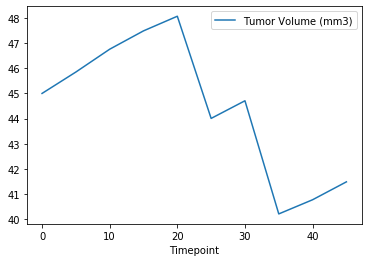

In [28]:
Row = T[T['Mouse ID']==('l509')]
Row
Row.plot.line(x='Timepoint', y= 'Tumor Volume (mm3)')

In [29]:
h = T.groupby(['Mouse ID'])['Timepoint']
i = T.groupby(['Mouse ID'])['Tumor Volume (mm3)']
#plt.plot(i,h)
#plt.show()


In [30]:
scat =T[['Tumor Volume (mm3)','Timepoint','Drug Regimen']]
scat

,Tumor Volume (mm3),Timepoint,Drug Regimen
0,45.000000,0,Capomulin
1,45.651331,5,Capomulin
2,43.270852,10,Capomulin
3,43.784893,15,Capomulin
4,42.731552,20,Capomulin
...,...,...,...
1888,33.118756,25,Capomulin
1889,31.758275,30,Capomulin
1890,30.834357,35,Capomulin
1891,31.378045,40,Capomulin


In [31]:
p = group.pivot_table(index='Timepoint', columns= 'Drug Regimen', values='Tumor Volume (mm3)')
p
#plt.plot(p['Capomulin'])

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
T =group[(group["Drug Regimen"]== 'Capomulin')]
T

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


TypeError: 'str' object is not callable

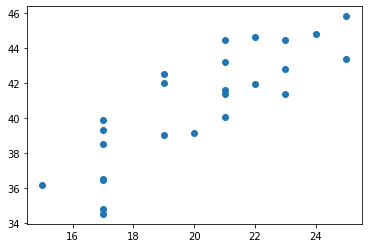

In [35]:
new = T.groupby(['Mouse ID'])['Weight (g)'].mean()
news = T.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

plt.scatter(new,news)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

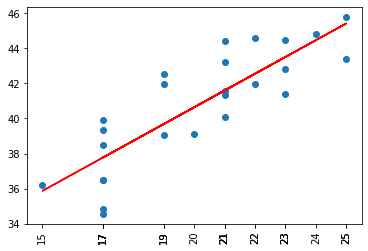

The correlation between weight and tumor value is 0.84


In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, int, r_value, p_value, std_err = st.linregress(new,news)

fit = slope * new + int

plt.scatter(new,news)
#plt.xlabel("Weight of Mouse")
#plt.ylabel("Tumor Volume")
plt.plot(new,fit,"", color='r')
plt.xticks(new, rotation=90)
plt.show()

corr = round(st.pearsonr(new,news)[0],2)
print(f'The correlation between weight and tumor value is {corr}')